In [111]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Stars List.xlsx', skiprows=1)

In [4]:
df

,Constellation,Common Name,Name,HD,Hipparcos Catalogue,RA,Dec,vis.\nmag.,abs.\nmag.,Dist. (ly),Sp. class,Notes
0,UMa,Alkaid,η UMa,120315,67301,13h 47m 32.55s,+49° 18′ 47.9″,1.85,−0.60,101,B3V SB,"Benetnasch, Alkaid, Elkeid"
1,UMa,Alcor,ζ UMa,116842,65477,13h 25m 13.54s,+54° 59′ 16.7″,3.99,2,82,A5Vn,"Saidak, Suha, Arundhati; naked-eye double star..."
2,UMa,Mizar,ζ1 UMa,116656,65378,13h 23m 55.54s,+54° 55′ 31.3″,2.23,0.32,83,A2V SB,"Mizar A; spectroscopic binary, visual double s..."
3,UMa,Alioth,ε UMa,112185,62956,12h 54m 01.63s,+55° 57′ 35.4″,1.76,−0.21,81,A0p,Alioth; brown dwarf companion?; α² CVn variable
4,UMa,Megrez,δ UMa,106591,59774,12h 15m 25.45s,+57° 01′ 57.4″,3.32,1.33,81,A3Vvar,"Megrez, Kaffa"
5,UMa,Dubhe,α UMa,95689,54061,11h 03m 43.84s,+61° 45′ 04.0″,1.81,−1.08,124,F7V comp,"Dubhe, Dubh, Dubb, Thahr al Dub al Akbar, Ak"
6,UMa,Merak,β UMa,95418,53910,11h 01m 50.39s,+56° 22′ 56.4″,2.34,0.41,79,A1V,"Merak, Mirak"
7,UMa,Phecda,γ UMa,103287,58001,11h 53m 49.74s,+53° 41′ 41.0″,2.41,0.36,84,A0V SB,"Phad, Phecda, Phegda, Phekha, Phacd"


In [115]:
def convert_RA_to_Num(value):
    RA_Text = re.compile('\+?(?P<hour>[0-9]{1,2})(?P<unit>[hH°]) ?((?P<minute>[0-9]{1,2}).)? ?((?P<second>[0-9]{1,2}\.?[0-9]+).)?')
    result = RA_Text.match(value)
    if result:
        coordonate = {}
        for i in ['hour', 'minute', 'second']:
            coordonate[i] = float(result.group(i)) if result.group(i) is not None else 0
        if result.group('unit') in ['h', 'H']:
            degree = coordonate['hour'] * 360 / 24
        else:
            degree = coordonate['hour']
        res = degree + (coordonate['minute'] / 60) + (coordonate['second'] / 3600)
    else:
        res = None
    
    return res


In [116]:
convert_RA_to_Num('+49° 18′ 47.9″')

49.31330555555555

In [117]:
df['RA_Num'] = df['RA'].apply(convert_RA_to_Num)
df['Dec_Num'] = df['Dec'].apply(convert_RA_to_Num)


In [118]:
df

,Constellation,Common Name,Name,HD,Hipparcos Catalogue,RA,Dec,vis.\nmag.,abs.\nmag.,Dist. (ly),Sp. class,Notes,RA_Num,Dec_Num
0,UMa,Alkaid,η UMa,120315,67301,13h 47m 32.55s,+49° 18′ 47.9″,1.85,−0.60,101,B3V SB,"Benetnasch, Alkaid, Elkeid",195.792375,49.313306
1,UMa,Alcor,ζ UMa,116842,65477,13h 25m 13.54s,+54° 59′ 16.7″,3.99,2,82,A5Vn,"Saidak, Suha, Arundhati; naked-eye double star...",195.420428,54.987972
2,UMa,Mizar,ζ1 UMa,116656,65378,13h 23m 55.54s,+54° 55′ 31.3″,2.23,0.32,83,A2V SB,"Mizar A; spectroscopic binary, visual double s...",195.398761,54.925361
3,UMa,Alioth,ε UMa,112185,62956,12h 54m 01.63s,+55° 57′ 35.4″,1.76,−0.21,81,A0p,Alioth; brown dwarf companion?; α² CVn variable,180.900453,55.959833
4,UMa,Megrez,δ UMa,106591,59774,12h 15m 25.45s,+57° 01′ 57.4″,3.32,1.33,81,A3Vvar,"Megrez, Kaffa",180.257069,57.032611
5,UMa,Dubhe,α UMa,95689,54061,11h 03m 43.84s,+61° 45′ 04.0″,1.81,−1.08,124,F7V comp,"Dubhe, Dubh, Dubb, Thahr al Dub al Akbar, Ak",165.062178,61.751111
6,UMa,Merak,β UMa,95418,53910,11h 01m 50.39s,+56° 22′ 56.4″,2.34,0.41,79,A1V,"Merak, Mirak",165.030664,56.382333
7,UMa,Phecda,γ UMa,103287,58001,11h 53m 49.74s,+53° 41′ 41.0″,2.41,0.36,84,A0V SB,"Phad, Phecda, Phegda, Phekha, Phacd",165.897150,53.694722


TypeError: cannot unpack non-iterable numpy.float64 object

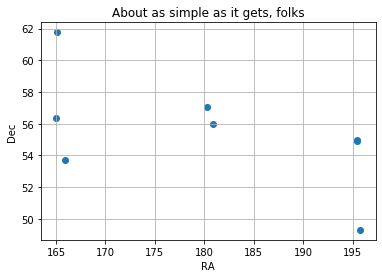

In [122]:
# Data for plotting
fig, ax = plt.subplots()
ax.scatter(df['RA_Num'], df['Dec_Num'])

ax.set(xlabel='RA', ylabel='Dec',
       title='About as simple as it gets, folks')
ax.grid()

for i, txt in enumerate(df['Common Name']):
    ax.annotate(txt, df.iloc[i]['RA_Num'], df.iloc[i]['Dec_Num'])

#fig.savefig("test.png")


plt.show()